In [33]:
from modules.util import load_data

dataset, data, G, nodes = load_data('citeseer')

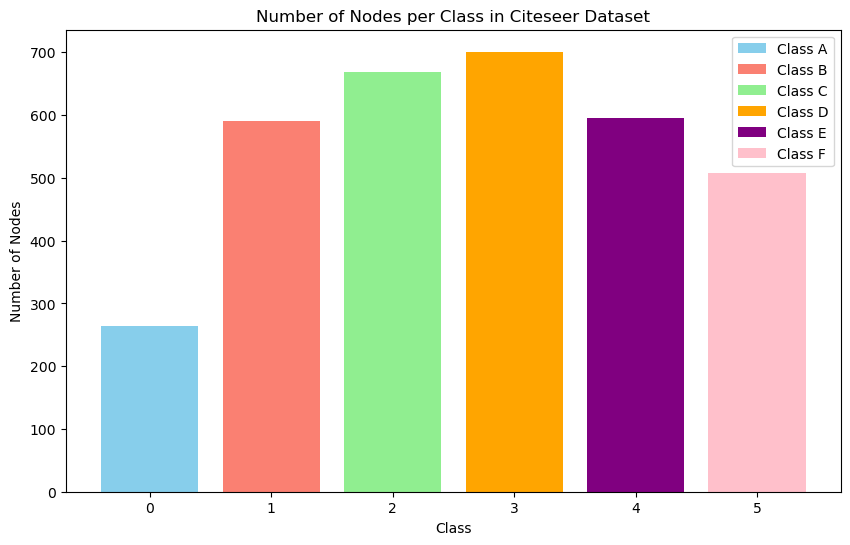

In [34]:
# Count the number of nodes per class
import torch
import matplotlib.pyplot as plt
num_classes = dataset.num_classes
class_counts = torch.zeros(num_classes, dtype=torch.int64)

class_names = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E', 'Class F']


for label in data.y:
    class_counts[label] += 1

# Convert to a list for plotting
class_counts = class_counts.tolist()
# Colors for each class
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'pink']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(range(num_classes), class_counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes per Class in Citeseer Dataset')

# Add color legend
plt.legend(bars, class_names)

plt.show()

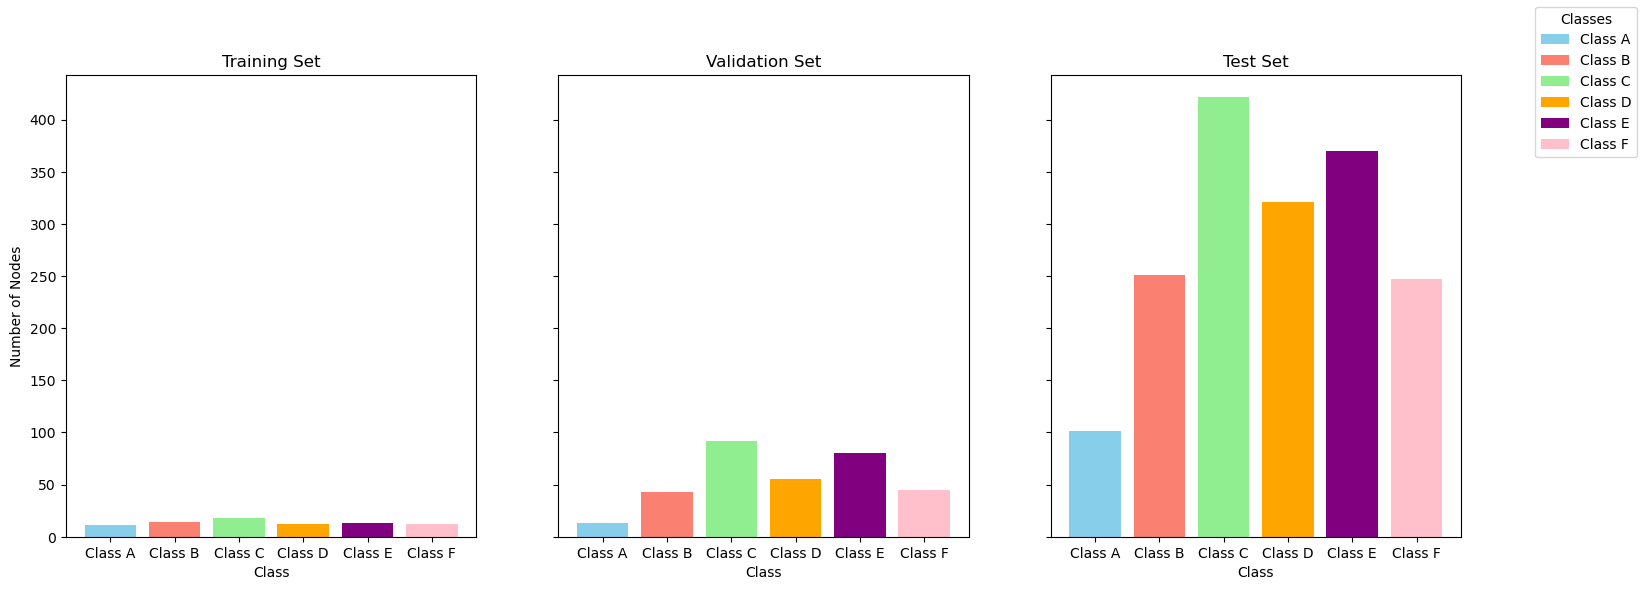

In [38]:
import torch
from torch_geometric.datasets import Planetoid
import matplotlib.pyplot as plt


# Count the number of nodes per class for train, val, and test sets
def count_nodes_per_class(mask):
    counts = torch.zeros(dataset.num_classes, dtype=torch.int64)
    for label in data.y[mask]:
        counts[label] += 1
    return counts.tolist()

train_counts = count_nodes_per_class(data.train_mask)
val_counts = count_nodes_per_class(data.val_mask)
test_counts = count_nodes_per_class(data.test_mask)

# Plotting the bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Training set
axes[0].bar(range(dataset.num_classes), train_counts, color=colors)
axes[0].set_title('Training Set')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Nodes')
axes[0].set_xticks(range(dataset.num_classes))
axes[0].set_xticklabels(class_names)

# Validation set
axes[1].bar(range(dataset.num_classes), val_counts, color=colors)
axes[1].set_title('Validation Set')
axes[1].set_xlabel('Class')
axes[1].set_xticks(range(dataset.num_classes))
axes[1].set_xticklabels(class_names)

# Test set
axes[2].bar(range(dataset.num_classes), test_counts, color=colors)
axes[2].set_title('Test Set')
axes[2].set_xlabel('Class')
axes[2].set_xticks(range(dataset.num_classes))
axes[2].set_xticklabels(class_names)

# Add legend
fig.legend(axes[0].patches, class_names, loc='upper right', title="Classes")

plt.show()


In [40]:
from modules.GNN import load_model

model = load_model("trained_GCNs/GCN-citeseer", dataset)

In [43]:
_, data_p, ea,er, perturb_type = randomly_perturb(G= G , data = dataset.data,remove = 0.1, add = 0.1)

h_p = model(data_p.x, data_p.edge_index)

out_p = h_p.argmax(dim = 1)

out_p[data.test_mask]

      

tensor([3, 3, 3,  ..., 3, 3, 3])

6

In [36]:
from modules.perturb import randomly_perturb
Gp, data, edges_to_add, edges_to_remove, perturb_type = randomly_perturb(G, data, 0, 0.4)

In [37]:
data.num_edges

5462

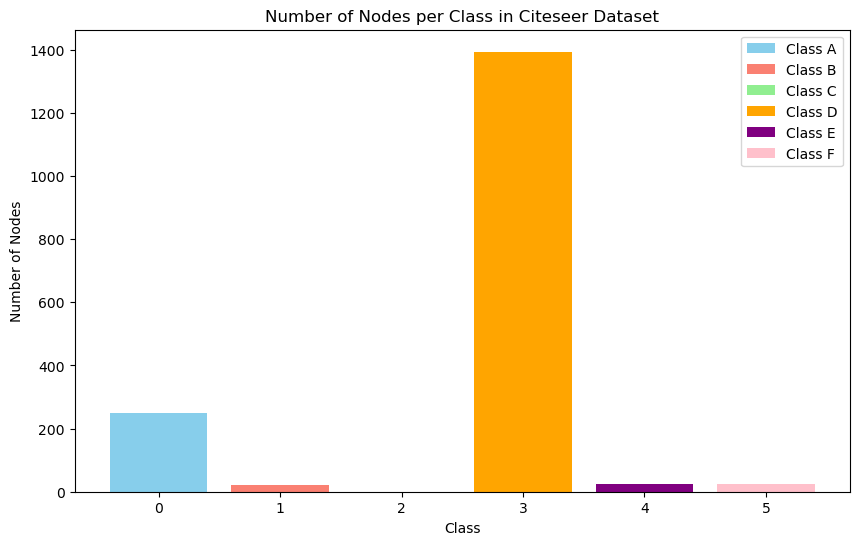

In [45]:
# Count the number of nodes per class
import torch
import matplotlib.pyplot as plt
num_classes = dataset.num_classes
class_counts = torch.zeros(num_classes, dtype=torch.int64)

class_names = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E', 'Class F']


for label in out_p[data.test_mask]:
    class_counts[label] += 1

# Convert to a list for plotting
class_counts = class_counts.tolist()
# Colors for each class
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'pink']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(range(num_classes), class_counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes per Class in Citeseer Dataset')

# Add color legend
plt.legend(bars, class_names)

plt.show()